# Zomato : EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('D:/FSDS-iNeuron/3.Resource/Dataset/zomato.csv', encoding='latin-1')   # latin=1 is utf-8 encoding
df.head()                                                                               # refer pandas documentation

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns             # Column names

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# important information about dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.dtypes             # data types of data set

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

# Information on integer features

In [12]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# In data analysys What all things we do 
1. Missing values
2. Explore about the Numerical variables
3. Explore about the Categorial variables
4. Finding relationship between features

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
df.isnull().sum().sum()

9

In [18]:
[features for features in df.columns if df[features].isnull().sum()>0]    # finding out the features

['Cuisines']

<AxesSubplot:>

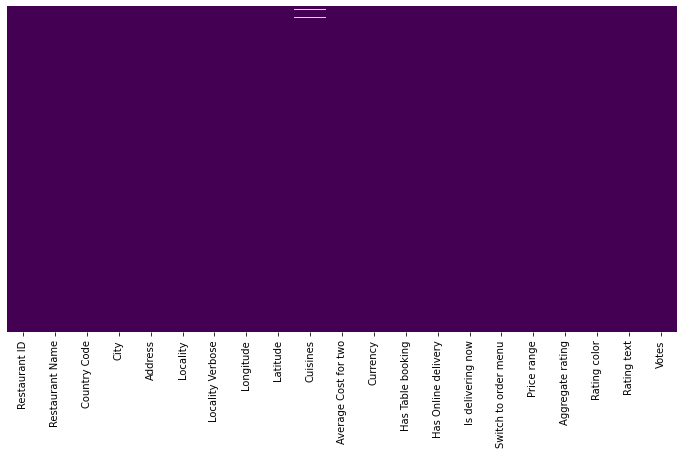

In [67]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')      # TO get the small missing values use rcParams

In [27]:
df_country = pd.read_excel('D:/FSDS-iNeuron/3.Resource/Dataset/Country-Code.xlsx')  
df_country.head()   

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [29]:
df_country.columns                 # Column names

Index(['Country Code', 'Country'], dtype='object')

Merging data frames

In [31]:
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')

In [33]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# To check data types

In [34]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [35]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

To get records with respect to country

The main base of Zomato is in India
Tha maximum number of transactions in India

In [36]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [42]:
# Country name which are in the first columns

country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object')

In [43]:
# To get all the records with respect to country

country_val = final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

# To plot pie chart

([<matplotlib.patches.Wedge at 0x2b2943cba90>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Qatar'),
  Text(1.0997248508282123, -0.02460187941736628, 'Singapore'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

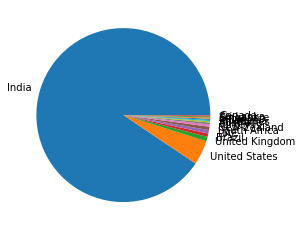

In [44]:
plt.pie(country_val, labels=country_names)

([<matplotlib.patches.Wedge at 0x2b2943e9bb0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

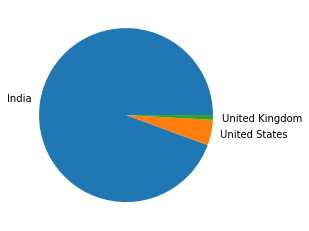

In [45]:
# TO get the top 3 countries that uses Zomato

plt.pie(country_val[:3], labels=country_names[:3])

TO get the top 3 countries and their percentage

([<matplotlib.patches.Wedge at 0x2b2977779a0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

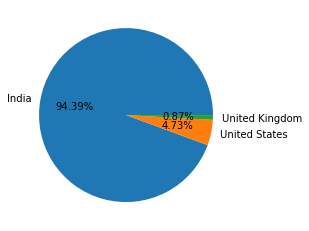

In [48]:


plt.pie(country_val[:3], labels=country_names[:3], autopct="%1.2f%%")

Observation : Zomato maximum reords or transactions are from India after that USA and United Kingdoms

In [49]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# Group by operation to compare features

In [52]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [56]:
# TO get the number of records

final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [60]:
# Column naming wherewver the column name is 0

ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})    # reset index set the row index
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observations

1. When rating is between 4.5 to 4.9   ---->> Excellent
2. When rating is between 4.0 to 4.4   ---->> Very Good
3. When rating is between 3.5 to 3.9   ---->> Good
4. When rating is between 3.0 to 3.5   ---->> Average
5. When rating is between 2.5 to 2.9   ---->> Average
6. When rating is between 2.0 to 2.4   ---->> Poor

In [61]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

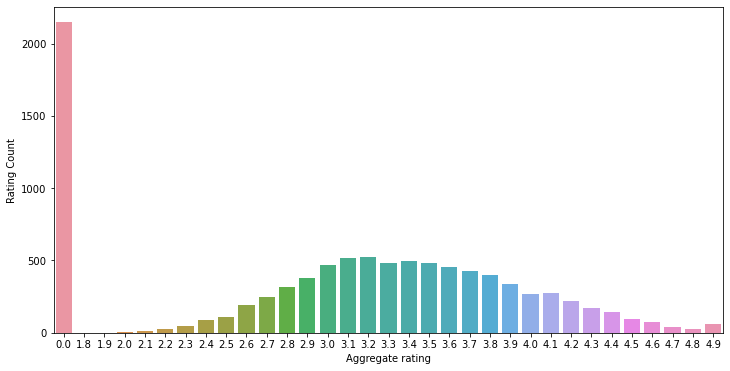

In [65]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)      # to get a larger plot
sns.barplot(x='Aggregate rating', y = 'Rating Count', data = ratings)

# TO get the the color as per data (rating color)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

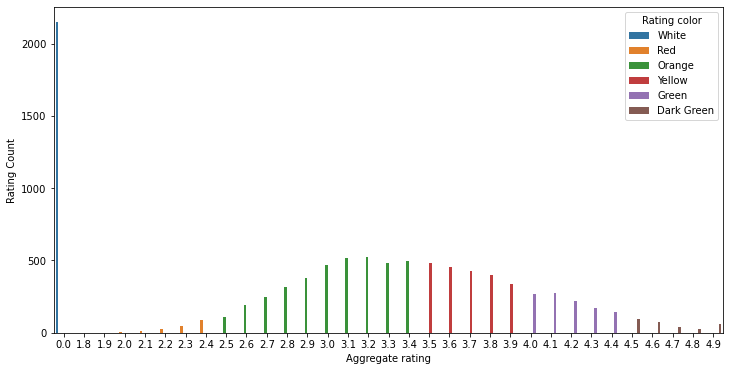

In [68]:
sns.barplot(x='Aggregate rating', y = 'Rating Count',hue = 'Rating color', data = ratings)

to map the color

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

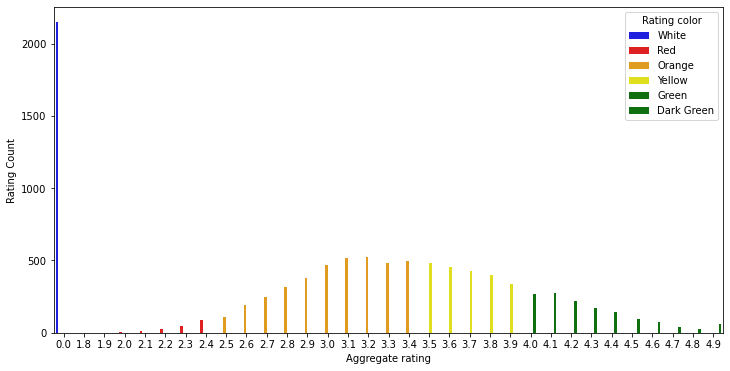

In [70]:
sns.barplot(x='Aggregate rating', y = 'Rating Count',hue = 'Rating color', data = ratings, palette= ['blue', 'red', 'orange', 'yellow', 'green', 'green'])

## Observation : 
     1. Not rated count is bery high
     2. Maximum number of ratings are between 2.5 to 3.4

# Count plot

<AxesSubplot:xlabel='Rating color', ylabel='count'>

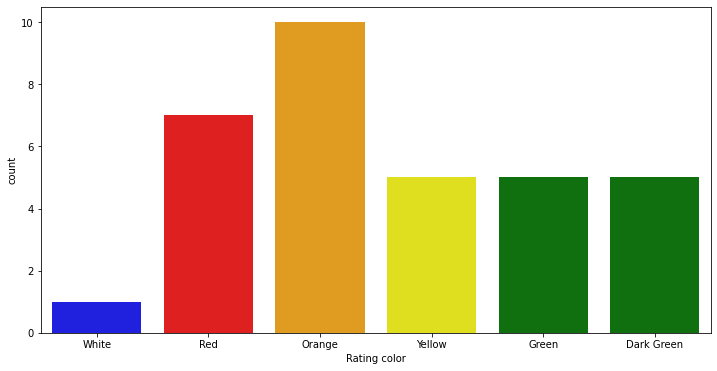

In [71]:
sns.countplot(x= "Rating color", data= ratings,  palette= ['blue', 'red', 'orange', 'yellow', 'green', 'green'])

# Find the country name that has given 0 ratings

In [74]:
final_df[final_df['Rating color'] == 'White']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,No,No,No,No,1,0.0,White,Not rated,2,Brazil
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,No,3,0.0,White,Not rated,1,Brazil
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,Brazil
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,"Brazilian, Mineira",...,No,No,No,No,3,0.0,White,Not rated,2,Brazil
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,2,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,1,India


In [76]:
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [77]:
final_df.groupby(['Aggregate rating', 'Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observations : 
Maximum number of 0 ratings are from India

# Find out which currency used by which country

In [78]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [84]:
final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [87]:
final_df.groupby(['Currency', 'Country']).size().reset_index().head(10)

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [86]:
# Which countries do have online deliveries

In [89]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [91]:
final_df[['Has Online delivery', 'Country']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [95]:
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

# Observations  :
Online delivery available in India & UAE

# Create a pie chart for cities distribution  ?

In [98]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Lucknow',
       'Amritsar', 'Bhubaneshwar', 'Ahmedabad', 'Guwahati',
       ...
       'Lincoln', 'Montville', 'Penola', 'Lorn', 'Miller', 'Mc Millan',
       'Vineland Station', 'Balingup', 'Ojo Caliente', 'Vernonia'],
      dtype='object', length=141)

In [101]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x2b2a0d46be0>,
 [Text(-0.2501618674207579, 1.0711764747643402, 'New Delhi'),
  Text(-0.745121915719338, -0.8091930120278745, 'Gurgaon'),
  Text(-0.023335860702208486, -1.0997524437823665, 'Noida'),
  Text(0.4451062250173843, -1.0059226851258372, 'Faridabad'),
  Text(0.5344697170236794, -0.9614271275477035, 'Ghaziabad'),
  Text(0.5489550432957175, -0.9532304865247423, 'Lucknow'),
  Text(0.5620711022307091, -0.9455559613461045, 'Amritsar'),
  Text(0.5750798895062447, -0.9377009761568373, 'Bhubaneshwar'),
  Text(0.5879789223862543, -0.9296670300863097, 'Ahmedabad'),
  Text(0.6007657390813725, -0.9214556564186973, 'Guwahati'),
  Text(0.6131375319471077, -0.9132701500201403, 'Macon'),
  Text(0.625100125752387, -0.9051242084843107, 'Rio de Janeiro'),
  Text(0.6369545100691332, -0.8968215832051494, 'Savannah'),
  Text(0.6486986328151094, -0.888363711428944, 'Nagpur'),
  Text(0.6603304609951781, -0.8797520572763077, 'Cedar Rapids/Iowa City'),
  Text(0.6718479810

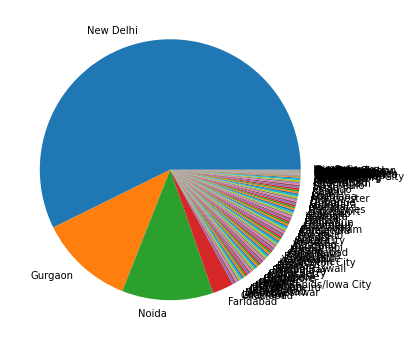

In [103]:
plt.pie(city_values, labels=city_labels)

([<matplotlib.patches.Wedge at 0x2b2a05af040>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')])

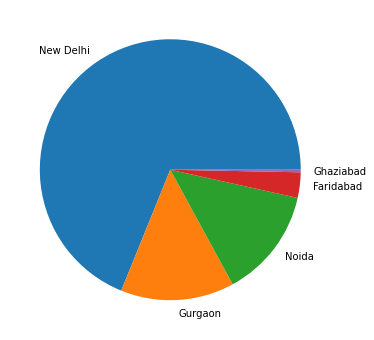

In [105]:
plt.pie(city_values[:5], labels=city_labels[:5])   # For top 5 cities

([<matplotlib.patches.Wedge at 0x2b2a03dd1f0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

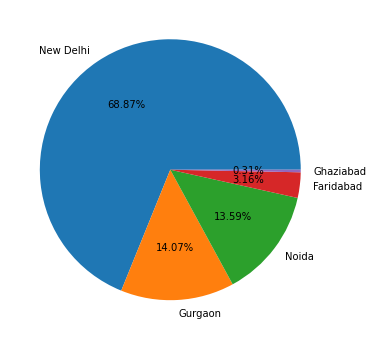

In [106]:
plt.pie(city_values[:5], labels=city_labels[:5], autopct='%1.2f%%')   # To get in percentage

# Assignment 
for top 10 cuisines

In [107]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [109]:
final_df.groupby(['Cuisines']).size().reset_index()

,Cuisines,0
0,Afghani,4
1,"Afghani, Mughlai, Chinese",1
2,"Afghani, North Indian",1
3,"Afghani, North Indian, Pakistani, Arabian",1
4,African,1
...,...,...
1820,"Western, Asian, Cafe",1
1821,"Western, Fusion, Fast Food",1
1822,World Cuisine,1
1823,"World Cuisine, Mexican, Italian",1


In [110]:
cuisines_values = final_df.Cuisines.value_counts().values
cuisines_labels = final_df.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x2b29ef00910>,
  ...],
 [Text(1.0481802116360581, 0.33364388790233873, 'North Indian'),
  Text(0.7784574052735118, 0.7771769863903791, 'North Indian, Chinese'),
  Text(0.5287480351254255, 0.9645856703015042, 'Chinese'),
  Text(0.29163294537707396, 1.0606367074407206, 'Fast Food'),
  Text(0.04598117735506794, 1.0990385486092114, 'North Indian, Mughlai'),
  Text(-0.1824076156037581, 1.0847706954788887, 'Cafe'),
  Text(-0.3635267310093821, 1.0381947388816957, 'Bakery'),
  Text(-0.5015503630527661, 0.9790031835094504, 'North Indian, Mughlai, Chinese'),
  Text(-0.6158992886784487, 0.9114099331285461, 'Bakery, Desserts'),
  Text(-0.7080523253060835, 0.8418205893351911, 'Street Food'),
  Text(-0.7825406309240749, 0.773065431223613, 'Pizza, Fast Food'),
  Text(-0.8432176771066132, 0.7063879592794088, 'Chinese, Fast Food'),
  Text(-0.8950840506131212, 0.6393938866911439, 'Mithai, Street Food'),
  Text(-0.9405152572514955, 0.5704656439060579, 'South Indian'),
  Te

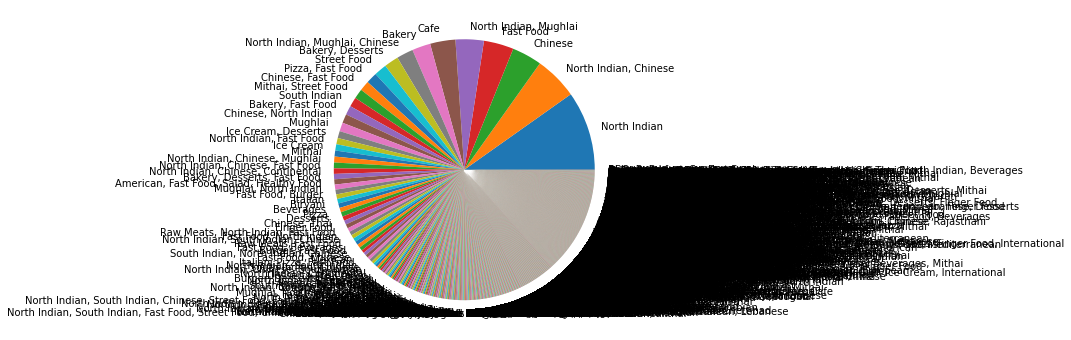

In [112]:
plt.pie(cuisines_values, labels=cuisines_labels)

([<matplotlib.patches.Wedge at 0x2b2a3a20f70>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')])

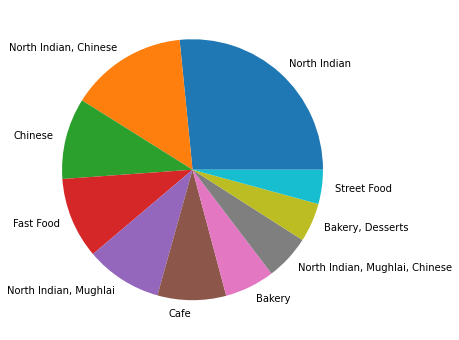

In [114]:
plt.pie(cuisines_values[:10], labels=cuisines_labels[:10])

([<matplotlib.patches.Wedge at 0x2b2a3a375b0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

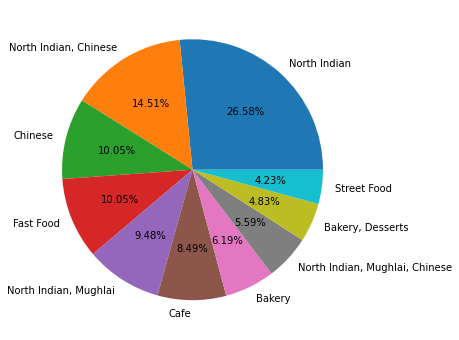

In [115]:
plt.pie(cuisines_values[:10], labels=cuisines_labels[:10], autopct='%1.2f%%')